### Exercise 1: matrix madness

1. Perform the matrix multiplication

   $$
   \begin{bmatrix}
   3 & -2 & 1 \\
   6 & 0 & 4 \\
   5 & 2 & 3 \\
   \end{bmatrix}
   \begin{bmatrix}
   -1 & 4 \\
   3 & 2 \\
   7 & -4 \\
   \end{bmatrix}
   $$

2. Find the inverse of the matrix

   $$
   \begin{bmatrix}
   3.6 & -4.1 & 1.3 & 2.5 \\
   0.4 & 6.2 & -1.5 & 3.0 \\
   5.9 & 7.0 & -3.1 & 8.2 \\
   4.8 & -5.6 & 2.9 & 7.3 \\
   \end{bmatrix}
   $$

3. Solve the linear system

   $$
   \begin{bmatrix}
   4 & 1 & -3 & 2 \\
   0 & 7 & 5 & 1 \\
   -9 & 2 & 7 & 3 \\
   -4 & 5 & 1 & 8 \\
   \end{bmatrix}
   \begin{bmatrix}
   x_0 \\
   x_1 \\
   x_2 \\
   x_3 \\
   \end{bmatrix}
   =
   \begin{bmatrix}
   2 \\
   8 \\
   1 \\
   7 \\
   \end{bmatrix}
   $$

   and check the result.


In [1]:
# Code Here
import numpy as np
from scipy import linalg as la

#matrix multiplication
a = np.array([[3,-2,1],[6,0,4],[5,2,3]])
b = np.array([[-1,4],[3,2],[7,-4]])
print("Multiplication:\n",a.dot(b),"\n")

#find the inverse of the matrix

norm = np.array([[3.6,-4.1,1.3,2.5],[.4,6.2,-1.5,3.0],[5.9,7.0,-3.1,8.2],[4.8,-5.6,2.9,7.3]])
print("Inverse:\n",la.inv(norm),'\n\n')

#solve the linear system

l = np.array([[4,1,-3,2],[0,7,5,1],[-9,2,7,3],[-4,5,1,8]])
r = np.array([[2],[8],[1],[7]])
x = la.solve(l,r)
print("Solve Linear System:\n",np.dot(l,x)-r)


Multiplication:
 [[-2  4]
 [22  8]
 [22 12]] 

Inverse:
 [[ 0.97813868  0.52433284 -0.17479228 -0.35411624]
 [ 0.60841088  0.67406156 -0.25603252 -0.19777332]
 [ 1.35007366  1.45103917 -0.70650193 -0.26506655]
 [-0.71276416 -0.40411869  0.19918855  0.32341375]] 


Solve Linear System:
 [[4.44089210e-16]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.77635684e-15]]


### Exercise 2: rotation

Rotating a 2D vector through an angle $\mu$ corresponds to multiplying on the left by the matrix

$$
R(\theta) = \begin{bmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{bmatrix}
$$

1. Create a list of 2D position vectors corresponding to a 10x10 grid of points in the unit square. Plot the positions using dots.

2. Define a function that returns the rotation matrix for a given angle $\theta$.

3. Use your function to rotate the points through an angle of 25° and plot the new positions using dots of a different color.

4. How would you get the points to rotate about (0.5, 0.5) instead of the origin?


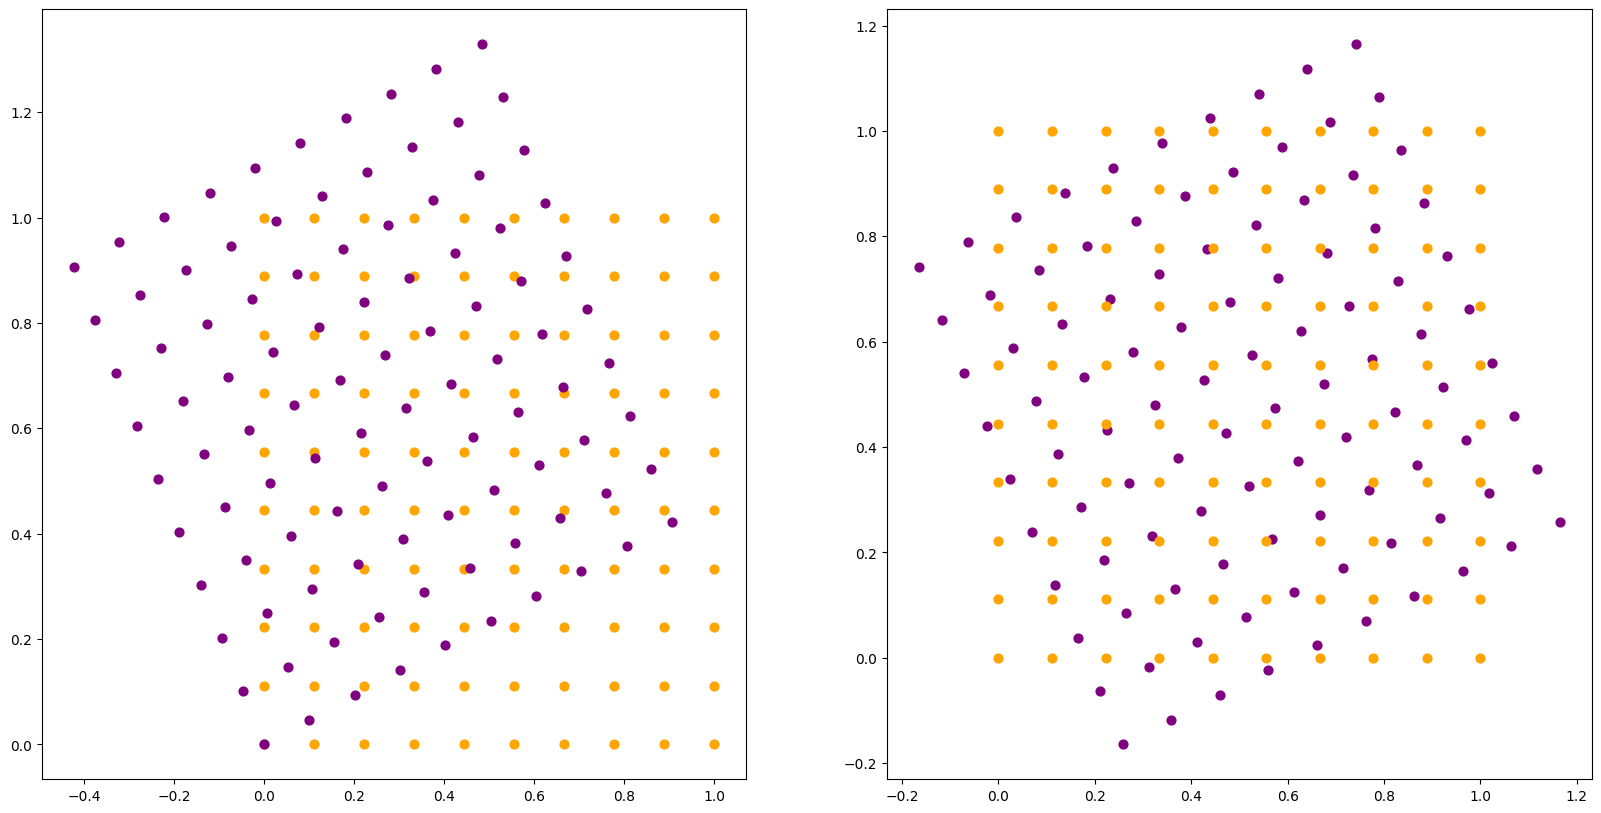

In [2]:
# Code here
import matplotlib.pyplot as plt
XX = YY = np.linspace(0,1,10)
X,Y = np.meshgrid(XX,YY)
unitsqr = np.array([[x,y] for x in XX for y in YY])
def rot(theta, unitsqr):
    theta = np.radians(theta)
    a = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])

    rotX,rotY = np.dot(a,unitsqr.T)
    return rotX, rotY

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
normrotX,normrotY = rot(25,unitsqr)
#added offset
rotX, rotY = rot(25,unitsqr-.5)
#correct offset
rotX+=.5
rotY+=.5
ax2.scatter(rotX,rotY,color="purple",s=40)
ax2.scatter(X,Y,color="orange",s=40)
ax1.scatter(X,Y,color="orange",s=40)
ax1.scatter(normrotX,normrotY,color="purple",s=40)




### Exercise 3: chemical equilibrium

Consider a mixture of three particle species that interact via the reactions

$$
A + A \rightleftharpoons B \\
A + B \rightleftharpoons C
$$

At a particular temperature, the reaction rates are such that, at equilibrium, we have... (please refer pdf)


In [13]:
# Code Here

kA = 1E-8
kAB = 1E-5
tB = 100
tC = .1
nA = 1E6
n = 1E6

for i in range(25):
    l = np.array([[(kA*nA),-tB**-1],[(tC**-1),(kAB*nA+(tC**-1))]])
    r = np.array([[0],[n*(tC**-1)]])
    f = la.solve(l,r)
    nA = f[0][0]
    nB = f[1][0]

nC = n - nA - nB
print("nA/n:",nA/n)
print("nB/n:",nB/n)
print("nC/n:",nC/n)

nA/n: 0.5436869211003696
nB/n: 0.29559844834328947
nC/n: 0.16071463055634086


In [4]:
%%capture
# Here we use a script to generate pdf and save it to google drive.

# After executing this cell, you will be asked to link to your GoogleDrive account.
# Then, the pdf will be generated and saved to your GoogleDrive account and you need to go there to download;

from google.colab import drive
drive.mount('/content/drive')
# install tex; first run may take several minutes
! apt-get install texlive-xetex
# file path and save location below are default; please change if they do not match yours
! jupyter nbconvert --output-dir='/content/drive/MyDrive/' '/content/drive/MyDrive/Colab Notebooks/lec22_ASTR310.ipynb' --to pdf

ModuleNotFoundError: No module named 'google.colab'